#Importing Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

#Importing Dataset

In [107]:
df=pd.read_csv('hotel_booking.csv')

#Exploratory Data Analysis and Data cleaning

In [108]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


In [109]:
df.tail(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


#Deleted Unwanted Columns

In [110]:
df.drop(["name","email","phone-number","credit_card","agent","company"],axis=1,inplace=True)

In [111]:
df.shape

(119390, 30)

In [112]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [114]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [115]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [116]:
df.dropna(inplace=True)

In [117]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [118]:
df=df[df["adr"]<5000]

#Data Analysis and Visualisation

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


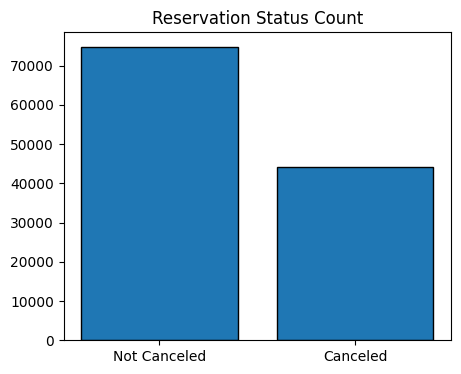

In [150]:
canceled_perc=df["is_canceled"].value_counts(normalize=True)
print(canceled_perc)

plt.figure(figsize=(5,4))
plt.title("Reservation Status Count")
plt.bar(["Not Canceled","Canceled"],df["is_canceled"].value_counts(),edgecolor="k",width=0.8)
plt.savefig("frist.jpeg",facecolor="white",pad_inches=0,bbox_inches="tight")
plt.show()

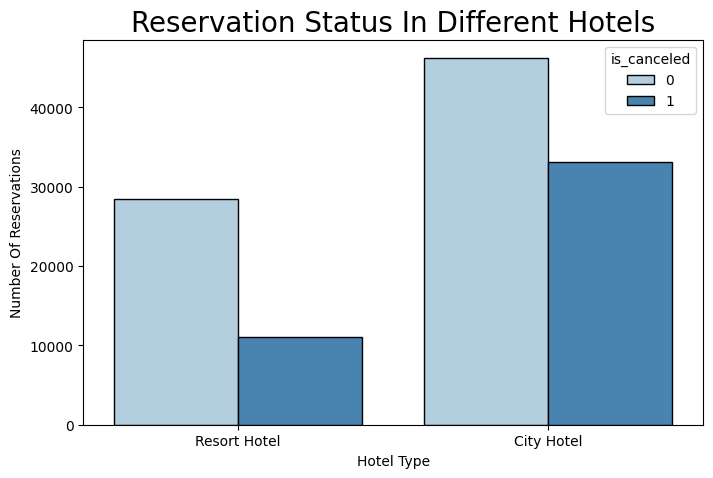

In [139]:
plt.figure(figsize=(8,5))
sns.countplot(x="hotel",hue="is_canceled",data=df,palette="Blues",edgecolor="k")
plt.title("Reservation Status In Different Hotels",size=20)
plt.xlabel("Hotel Type")
plt.ylabel("Number Of Reservations")
plt.show()

In [121]:
resort_hotel=df[df["hotel"]=="Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [122]:
city_hotel=df[df["hotel"]=="City Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [123]:
resort_hotel=resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel=city_hotel.groupby("reservation_status_date")[["adr"]].mean()

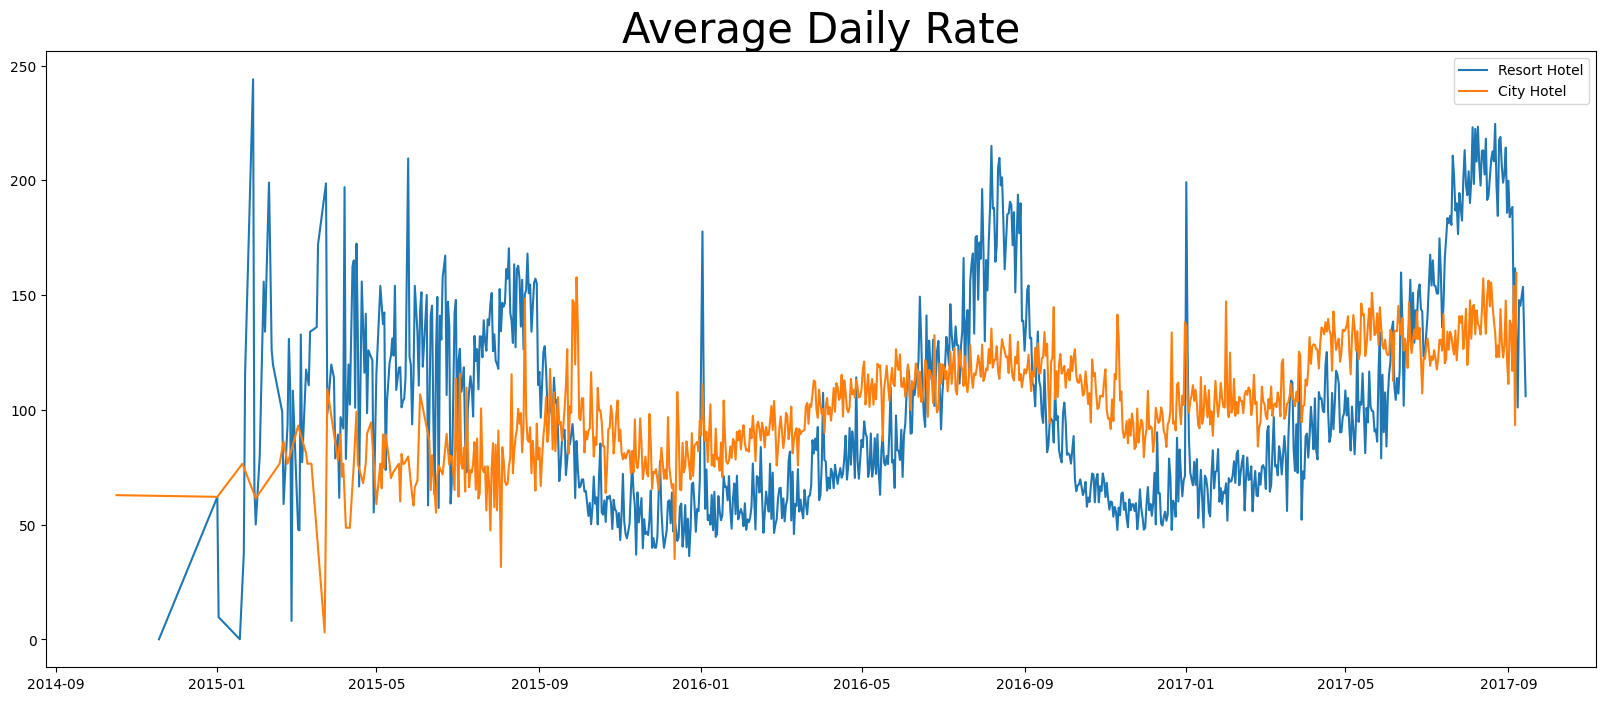

In [142]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate",fontsize=30)
plt.plot(resort_hotel.index,resort_hotel["adr"],label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label="City Hotel")
plt.legend()
plt.show()

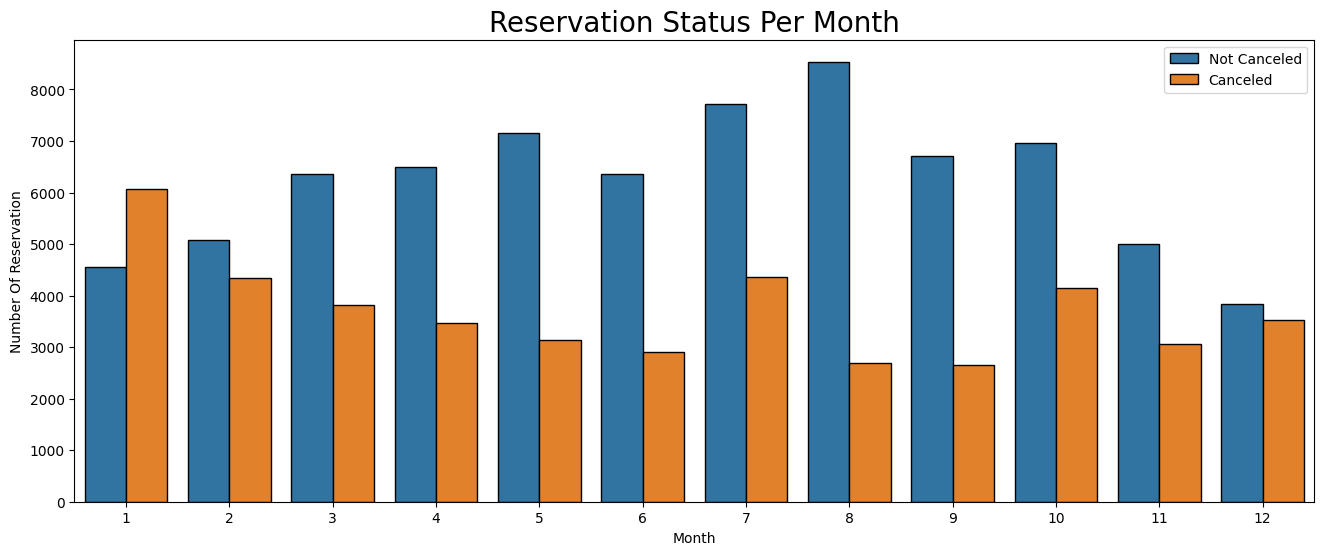

In [147]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(16,6))
ax1=sns.countplot(x="month",hue="is_canceled",data=df,edgecolor="k")
plt.title("Reservation Status Per Month",fontsize=20)
plt.ylabel("Number Of Reservation")
plt.xlabel("Month")
plt.legend(["Not Canceled","Canceled"])
plt.show()

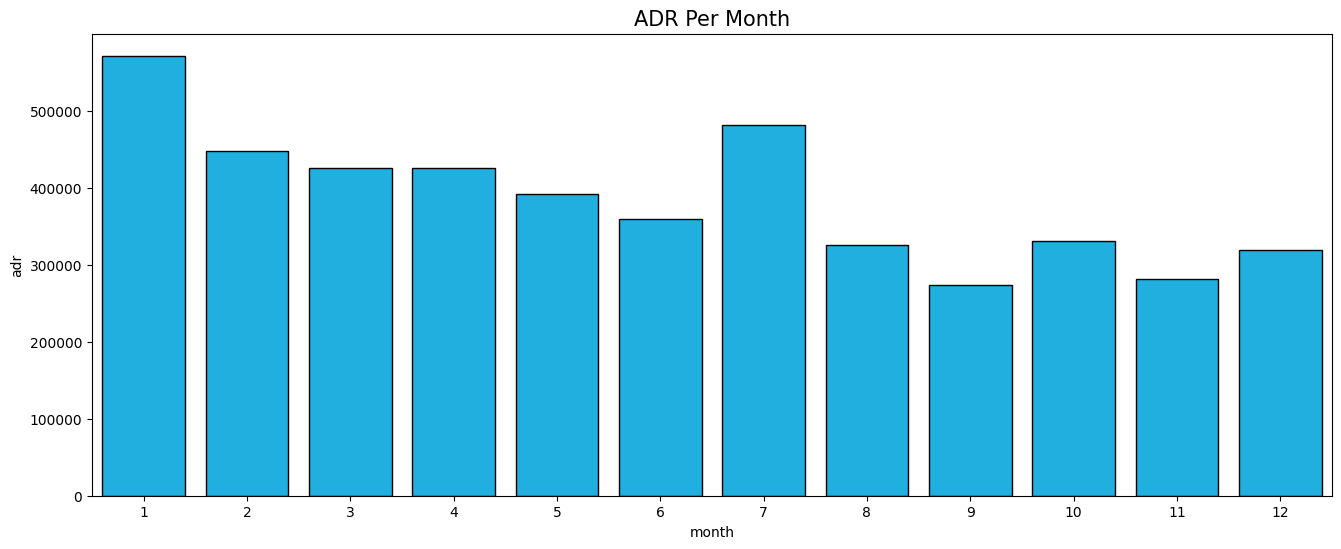

In [149]:
plt.figure(figsize=(16,6))
plt.title("ADR Per Month",fontsize=15)
sns.barplot(x="month",y="adr",data=df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index(),color="deepskyblue",edgecolor="k")
plt.show()

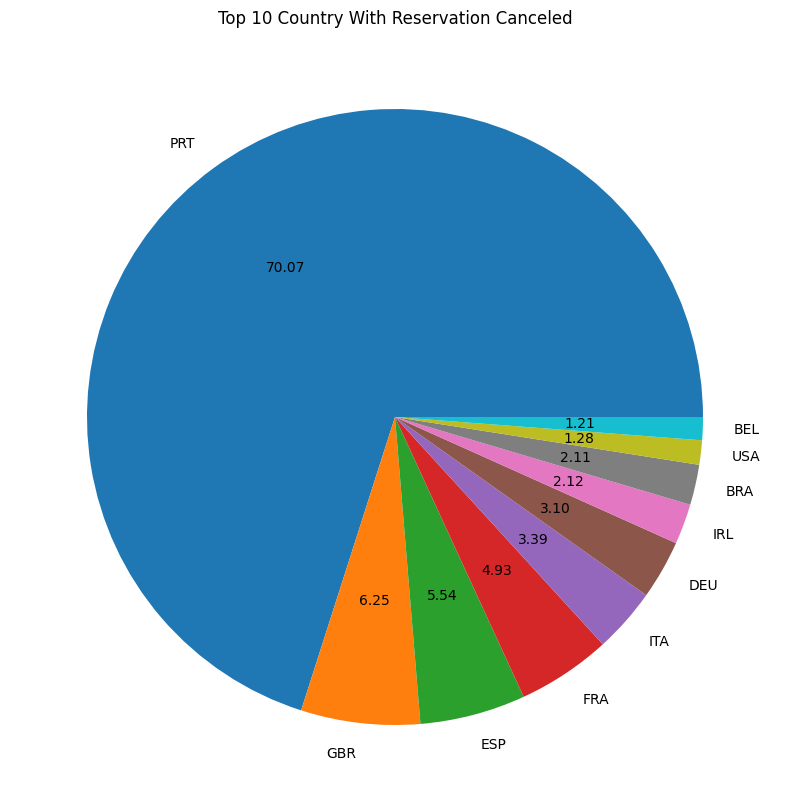

In [152]:
cancelled_data=df[df["is_canceled"]==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(25,10))
plt.title("Top 10 Country With Reservation Canceled")
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)
plt.show()

In [128]:
df["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [129]:
df["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [130]:
cancelled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

In [131]:
cancelled_adr=df[df["is_canceled"]==1]
cancelled_adr=cancelled_adr.groupby("reservation_status_date")[["adr"]].mean()
cancelled_adr.reset_index(inplace=True)
cancelled_adr.sort_values("reservation_status_date",inplace=True)

not_cancelled_adr=df[df["is_canceled"]==0]
not_cancelled_adr=not_cancelled_adr.groupby("reservation_status_date")[["adr"]].mean()
not_cancelled_adr.reset_index(inplace=True)
not_cancelled_adr.sort_values("reservation_status_date",inplace=True)

In [134]:
cancelled_adr=cancelled_adr[(cancelled_adr["reservation_status_date"]>"2016")&(cancelled_adr["reservation_status_date"]<"2017-09")]
not_cancelled_adr=not_cancelled_adr[(not_cancelled_adr["reservation_status_date"]>"2016")&(not_cancelled_adr["reservation_status_date"]<"2017-09")]

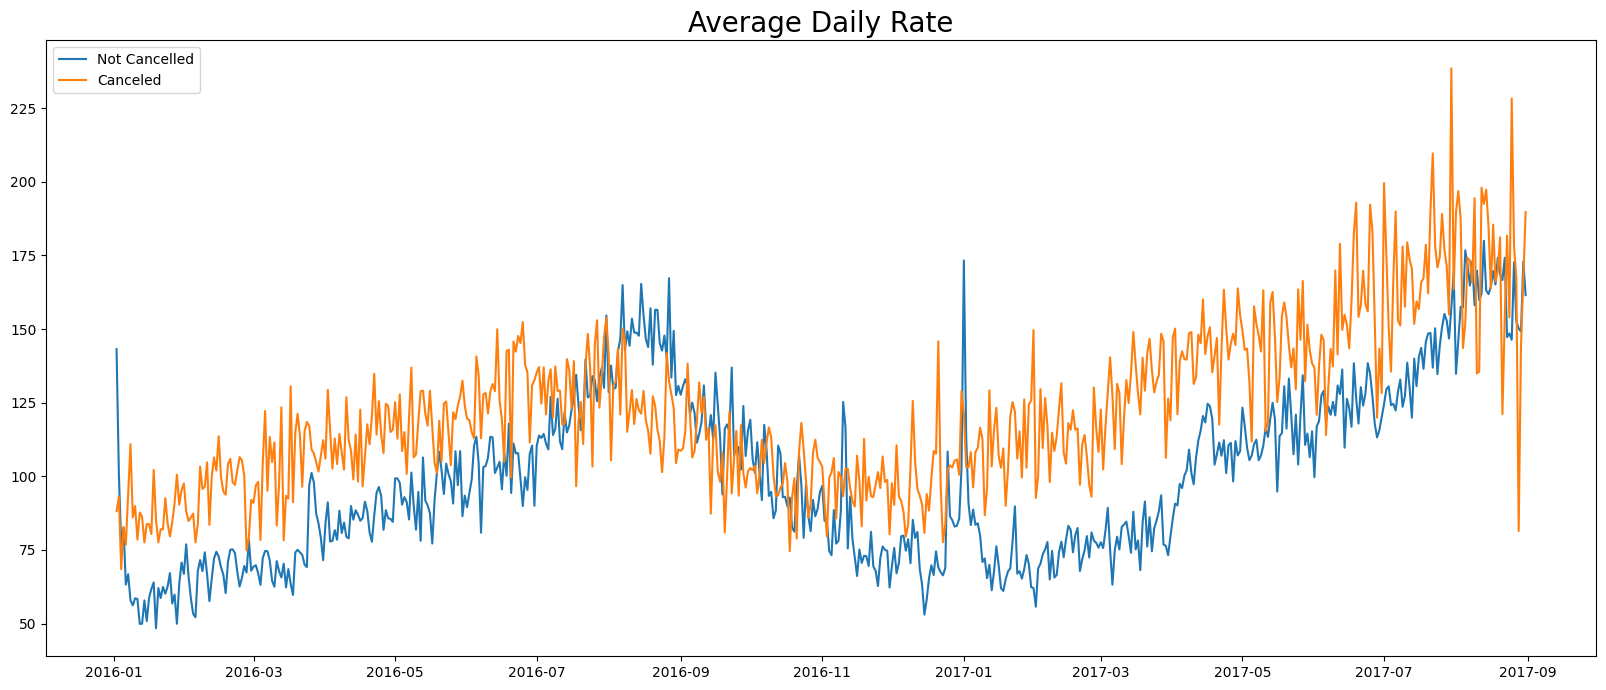

In [154]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate",fontsize=20)
plt.plot(not_cancelled_adr["reservation_status_date"],not_cancelled_adr["adr"],label="Not Cancelled")
plt.plot(cancelled_adr["reservation_status_date"],cancelled_adr["adr"],label="Canceled")
plt.legend()
plt.show()